In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score


plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),   })


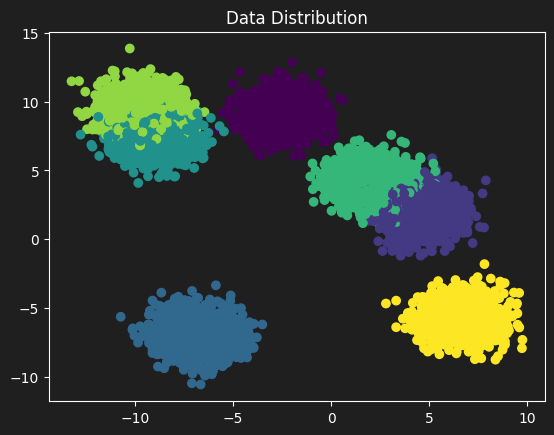

(10000, 2) (10000, 1)
[[ 6.09199654  1.98731895]
 [-3.55610861  9.55093888]
 [-4.38437009  9.12931221]
 [ 4.2288539   2.99479267]
 [-6.13426647 -6.7865861 ]] [[1]
 [0]
 [0]
 [1]
 [2]]


In [57]:
X,y = make_blobs(n_samples=10000, centers=7, n_features=2, random_state=42)
y = y.reshape(-1,1)
plt.scatter(X[:,0], X[:,1],c=y ,cmap='viridis')
plt.title('Data Distribution')
plt.show()  # Show the plot
print(X.shape, y.shape)
print(X[:5], y[:5])

the fct make_blobs  permet de creer des points alea avec la precision de nombre de l'alea avec la fonction random state

dimension de X (100, 2)
dimension de y (100, 1)


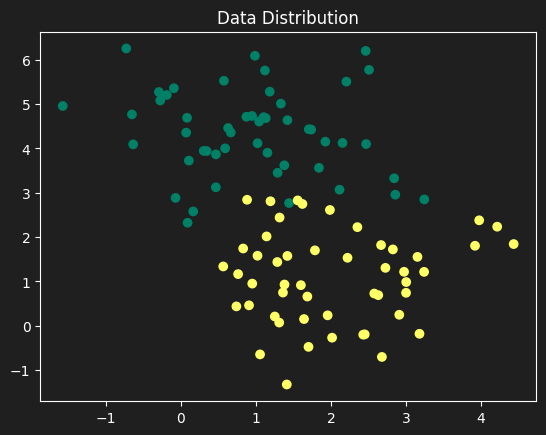

In [58]:
#The issue is that the make_blobs function generates a dataset with 3 clusters by default. 
#You need to specify the number of clusters using the centers parameter to ensure that only 2 clusters are generated.
X,y = make_blobs(n_samples=100,centers=2, n_features=2, random_state=0) 
y = y.reshape((y.shape[0],1))
X[:,1] = X[:,1]*1# c'1 test pour voir si on change les para w la fonction cout completement compresee est notre alg de desc gradient va difficilement converger

print("dimension de X" , X.shape)
print("dimension de y" , y.shape)
plt.scatter(X[:,0], X[:,1],c=y ,cmap='summer')
plt.title('Data Distribution')
plt.show() 

### FONCTIONS 

In [59]:
def initialisation(X):
    # Initialize weights with random values from a normal distribution
    w = np.random.randn(X.shape[1], 1)
    # Initialize bias with a random value from a normal distribution
    b = np.random.randn(1)    
    # Return the initialized weights and bias as a tuple
    return (w, b)

################
def model(X,w,b):
    z = X.dot(w) + b
    print(z.max())
    A = 1/(1+np.exp(-z))
    return A


w, b = initialisation(X)
print(w.shape) 
print( b.shape) 
print(X.shape)

A = model(X,w,b)
A.shape
###############
# def log_loss(y,A):
#     epsilon = 1e-10
#     L = 1 / len(y)*np.sum(-y*np.log(A+ epsilon)-(1-y)*np.log(1-A+epsilon),axis=0)
#     return L
# log_loss(y,A)
def log_loss(y, A):
    epsilon = 1e-10
    y = y.reshape(-1, 1)  # Ensure y is columnar
    A = A.reshape(-1, 1)  # Ensure A matches y
    L = (1 / len(y)) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0)
    return L

################
def gradients(A,X,y):
    dw = 1/len(y)*np.dot(X.T,A-y)
    db = 1/len(y)*np.sum(A-y)
    return (dw,db)

dw,db = gradients(A,X,y)
dw.shape
db
################

def update(dw,db,w,b,learning_rate):
    w = w - learning_rate * dw 
    b = b - learning_rate * db
    return (w,b) #cette fc retourne un tuple comprenant w & b

###############"
def predict(X, w, b):
    A = model(X,w,b)

    
    print(A)
    return A >= 0.5      

(2, 1)
(1,)
(100, 2)
4.467210924757043


Experience sur la Normalisation 

In [60]:
lim = 10
h = 100
w1 = np.linspace(-lim,lim,h)
w2 = np.linspace(-lim,lim,h)
w11, w22 = np.meshgrid(w1,w2)
w11.shape
print(w22.shape)
print(w11.shape)
# 10000 configurations of w1 and w2,
# on va concatenate ces 2 tableaux selon leur axe 1 et on va aussi l'aplatir,10000 dans W11 et 10000 dans W22 
W_final = np.c_[w11.ravel(), w22.ravel()].T # on met les deux vecteurs en colonne,c'est pour cela on a fait le .T, c'est comme on concatene les deux vecteurs en une ligne et on les transpose
print(W_final.shape)




(100, 100)
(100, 100)
(2, 10000)


Quand les variables sont sur une même échelle, la fonction Coût évolue
de facon similaire sur tous ses paramètres. Cela permet une bonne
convergence de l'algorithme de Descente de Gradients

Mais si une variable est plus imposante que l'autre (ici la variable x2)
Alors la fonction Coût est compressée, car w2 a un grand impact sur
la sortie A(Z). Cela complique la convergence de la Descente de Gradients

In [61]:
b=0 # ce qui nous intersse Z
z = X.dot(W_final) + b # pour w (2,10000) et X (100,2) => z (100,10000)
A = 1/(1+np.exp(-z))

print(X.shape, W_final.shape,  dw.shape, w.shape, A.shape)
print(type(A))
print(type(y))
print(type(W_final))

epsilon = 1e-10
L = 1 / len(y)*np.sum(-y*np.log(A+ epsilon)-(1-y)*np.log(1-A+epsilon),axis=0).reshape(w11.shape )
L.shape 
print(type(L))
print(L.shape)
print(W_final.shape)


(100, 2) (2, 10000) (2, 1) (2, 1) (100, 10000)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(100, 100)
(2, 10000)


In [62]:
A.shape

(100, 10000)

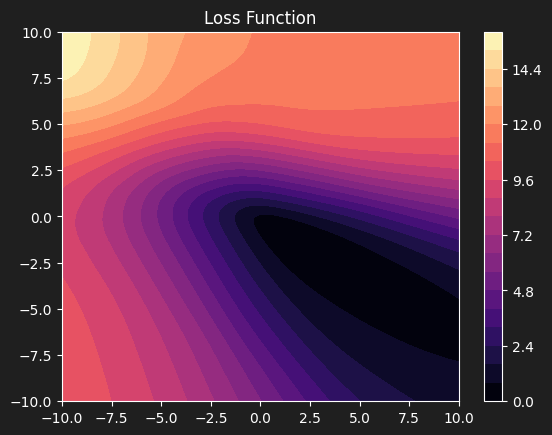

In [63]:
plt.contourf(w11,w22, L, 20, cmap ='magma')# w11 ,w22 sont les axes ,20 se designe levels 
plt.colorbar()# en ajpout une barre de couleur pour voir les valeurs de z
# ON VOIT CE GRAPHE CAR NOTRE DATSET N'est NORMAILSER
plt.title('Loss Function')
plt.show()

# obj est de faire un graphique qui puisse demontrer que lorsqu'une variable   
# devient trop impossante  et bien ce graphique commence a se compresser 

Pour Visualiser ca on va prendre le code suivant

In [64]:
def artificial_neuron_2(X, y, learning_rate=0.1, n_iter=1000):
	W, b = initialisation(X)
	W[0], W[1] = -7.5, -7.5
	nb = 10
	j = 0
	history = np.zeros((n_iter // nb, 5))
	Loss = []

	# Training
	for i in range(n_iter):
		A = model(X, W, b)
		Loss.append(log_loss(y, A))
		dw, db = gradients(A, X, y)
		W, b = update(dw, db, W, b, learning_rate=learning_rate)
		if i % nb == 0:
			history[j, 0] = W[0]# pour enregistrer les  10 iterations val de w1
			history[j, 1] = W[1]
			# celle ci n'est ^pas utiles 
			history[j, 2] = b
			history[j, 3] = i
			history[j, 4] = log_loss(y, A)
			j += 1

	plt.plot(Loss)
	plt.show()

	return history, b

In [65]:
def artificial_neuron_3(X, y, learning_rate=0.1, n_iter=1000):
    w, b = initialisation(X)
    w[0], w[1] = -7.5, -7.5

    nb = 10
    j = 0
    # 5 columns: iter, w1, w2, b, loss
    history = np.zeros((n_iter // nb, 5))
    Loss = []

    epsilon = 1e-10  # Small value to avoid invalid log inputs

    # Training
    for i in range(n_iter):
        A = model(X, w, b)

        # Debugging: Check the range of A
        if i % nb == 0:
            print(f"Iteration {i}: A min = {np.min(A)}, A max = {np.max(A)}")

        # Clip A to ensure it stays in the valid range
        A = np.clip(A, epsilon, 1 - epsilon)

        # Compute loss
        Loss.append(log_loss(y, A))

        # Compute gradients
        dw, db = gradients(A, X, y)

        # Update weights and bias
        w, b = update(dw, db, w, b, learning_rate)

        if i % nb == 0:
            history[j, 0] = w[0].item()  # Extract scalar value
            history[j, 1] = w[1].item()
            history[j, 2] = b.item() if np.ndim(b) > 0 else b
            history[j, 3] = i
            history[j, 4] = log_loss(y, A)
            j += 1

    # Plot loss
    plt.plot(Loss)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

    return history, b


-0.9713602726376924
-0.8515342979921372
-0.7318384127355071
-0.612279839648438
-0.4928654461298902
-0.37360163967147314
-0.2544942728244951
-0.13554856274285848
-0.01676902982606822
0.10184054101603558
0.22027711433502872
0.3385383928460543
0.4566227820838605
0.5745293338807083
0.6922576729218961
0.8098079116257166
0.9271805590970688
1.0443764298814489
1.1613965577165577
1.278242118505022
1.3949143654092824
1.5114145774124628
1.6277440210183953
1.7439039230993305
1.8598954513516537
1.9757196974851254
2.091377657227037
2.206870200522383
2.322198024978136
2.4373615856244317
2.5523609944058148
2.667195883401945
2.781865226523246
2.896367115245385
3.0106984847650056
3.1248547877354174
3.238829613468199
3.352614251190631
3.4661971966698806
3.5795636022821893
3.6926946714140993
3.8055669988975
3.9181518600094316
4.030414451657103
4.142313091552684
4.2537983863418
4.364812391036223
4.475287803992538
4.585147277539804
4.694302972828796
4.802656536646703
4.910099701111212
5.016515666652209
5.12

C:\Users\USER\AppData\Local\Temp\ipykernel_8928\1650211364.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_8928\1650211364.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_8928\1650211364.py:19: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_8928\1650211364.py:21: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

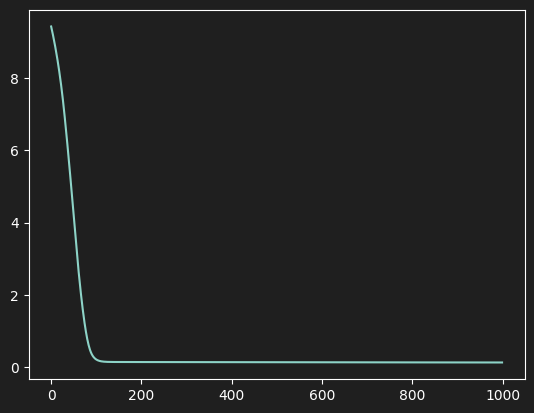

In [66]:
history, b = artificial_neuron_2(X, y)

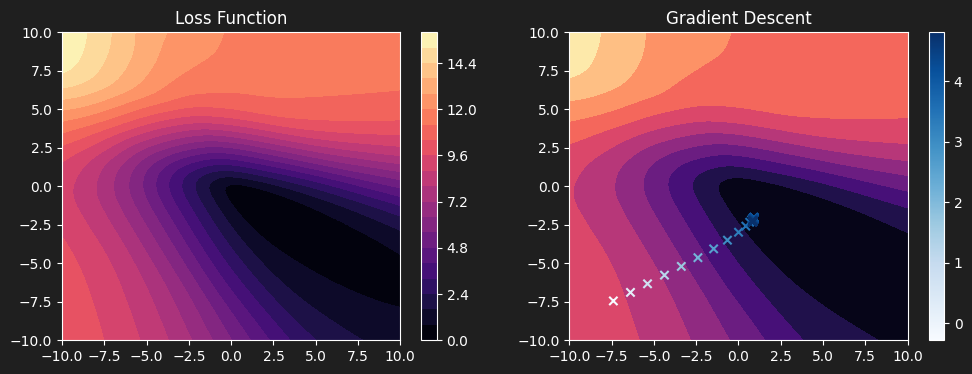

In [67]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.contourf(w11, w22, L, 20, cmap='magma')
plt.colorbar()
plt.title('Loss Function')

plt.subplot(1,2,2)
plt.contourf(w11,w22, L, 10, cmap='magma')
plt.scatter(history[:,0],history[:,1], c=history[:,2],cmap ='Blues', marker='x')
plt.colorbar()
plt.title('Gradient Descent')   
plt.show()


In [68]:
import plotly.graph_objects as go
fig = (go.Figure(data=[go.Surface(z=L, x=w11, y=w22,opacity =1)]))

fig.update_layout(template ="plotly_dark", margin=dict(l=0,r=0,b=0,t=0))
fig.layout.scene.camera.projection.type ="orthographic"
# import plotly.io as pio 
# pio.renderers.default = "browser"
# fig.show()
fig.show()

In [69]:
# pip install --upgrade nbformat 
# !pip install nbformat
# %pip install nbconvert
# %pip install nbconvert[webpdf]
# %pip install nbformat
# !pip install plotly

In [70]:
from tqdm import  tqdm

In [71]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.01, n_iter=1000):
    
#initialisation de w,b 
    w, b = initialisation(X_train)
    history = []
# 1 er etape visualiser notre modele pour s'assurer que notre modéle est bien appris qu'il réussisse son apprentissage pour ca on va creer une list Loss
# Lists to store loss and accuracy for both training and testing datasets
 
    train_loss =[]
    train_acc = []
    test_loss = []
    test_acc =  []
# Boucle d'apprentissage .
    for i in tqdm(range(n_iter)):
        A = model(X_train, w, b)

        if i %10 == 0:        
        # Train
           train_loss.append(log_loss(A,y_train))
           y_pred = predict(X_train,w,b)
           train_acc.append(accuracy_score(y_train, y_pred))

        # Test
           A_test= model(X_test, w, b)
           test_loss.append(log_loss(A_test,y_test))
           y_pred = predict(X_test , w, b)
           test_acc.append(accuracy_score(y_test, y_pred))
        
         # Update weights and bias
 
        dw,db = gradients(A, X_train, y_train)
        w,b = update(dw, db, w, b,learning_rate)
        
        # history.append([w,b,Loss,i])

    # Plotting the loss and accuracy
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train_loss')
    plt.plot(test_loss, label = 'test_loss')
    plt.legend ()

    plt.subplot(1,2,2)
    plt.plot(train_acc, label = 'train_acc')
    plt.plot(test_acc, label = 'test acc')
    plt.legend()
    plt.show()

    return (w,b)

    

In [72]:
print("Shape of y:", y.shape)
print("Shape of A:", A.shape)


Shape of y: (100, 1)
Shape of A: (100, 10000)


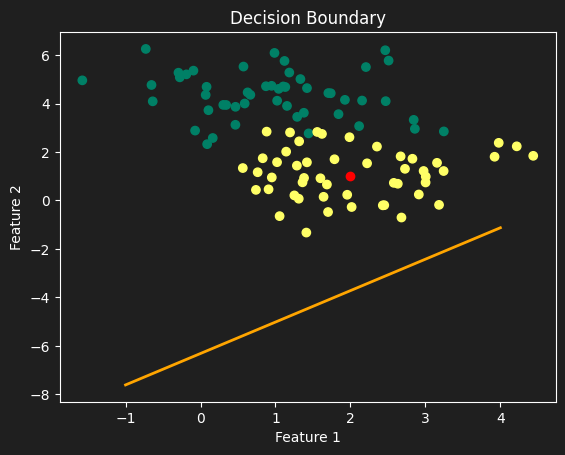

3.5975034694790304
[[0.9733383]]
Prediction for the new plant: [[ True]]


In [73]:
# Define the new plant data point
new_plant = np.array([[2, 1]])

# Define the range for x0
x0 = np.linspace(-1, 4, 100)

# Calculate the decision boundary line
x1 = (-w[0] * x0 - b) / w[1]

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[:, 0], new_plant[:, 1], c='red')
plt.plot(x0, x1, c='orange', lw=2)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Predict the class of the new plant
prediction = predict(new_plant, w, b)
print("Prediction for the new plant:", prediction)

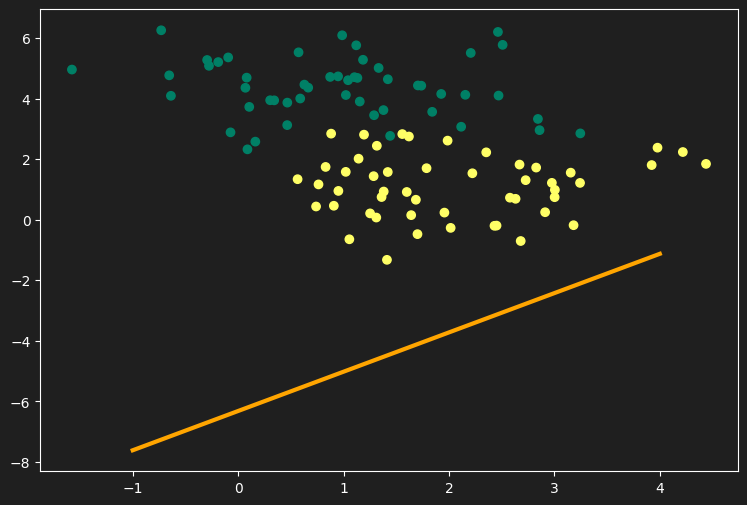

In [74]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - w[0] * x1 - b) / w[1]

ax.plot(x1, x2, c='orange', lw=3)

## Training Images

In [75]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [76]:
from utilities import load_data

In [77]:
print(load_data())


(array([[[164, 174, 163, ..., 144, 131, 134],
        [162, 174, 182, ..., 143, 144, 128],
        [158, 169, 187, ..., 158, 143, 151],
        ...,
        [175, 168, 166, ...,  91, 176, 173],
        [167, 166, 166, ...,  45, 184, 124],
        [176, 172, 168, ...,  87, 180,  39]],

       [[ 42,  43,  39, ...,  47,  46,  42],
        [ 38,  44,  42, ...,  40,  47,  42],
        [ 45,  46,  36, ...,  43,  40,  38],
        ...,
        [ 87,  85,  70, ...,  75,  78,  82],
        [ 70,  70,  71, ...,  52,  67,  68],
        [ 64,  61,  60, ...,  55,  52,  55]],

       [[ 27,  26,  29, ...,  84,  82,  84],
        [ 29,  27,  28, ...,  89,  88,  89],
        [ 28,  32,  27, ...,  88,  90,  86],
        ...,
        [101,  92,  17, ..., 112, 119, 123],
        [173, 178, 175, ..., 141, 137, 138],
        [ 10,  11,  26, ..., 135, 141, 121]],

       ...,

       [[ 47,  68, 142, ...,  39,  35,  33],
        [ 55,  68, 159, ...,  54,  41,  44],
        [ 58,  75, 141, ...,  40,  58,  6

In [78]:
# le modele utilities va nous permet de charger notre dataset et de l'utiliser pour entrainer notre modele
from utilities import *

In [79]:
X_train,y_train, X_test, y_test = load_data()   
print(X_train.shape) # 1000 photos  et 2 features
print(y_train.shape) # 1000 etiquets   et 1 label

print(np.unique(y_train,return_counts=True)) # 0 pour chat 1 pour chien ,
print(X_test.shape)
print(y_test.shape)
print((np.unique(y_test,return_counts=True))) # 100 photos pour chat et 100 photos pour

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))
(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


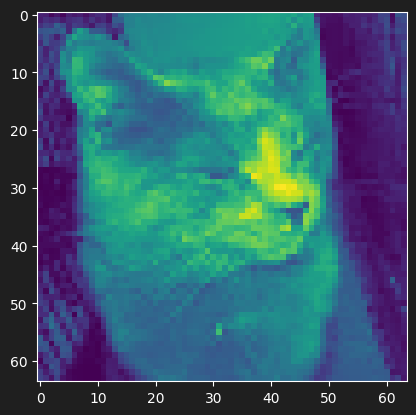

In [80]:
plt.imshow(X_train[10])  

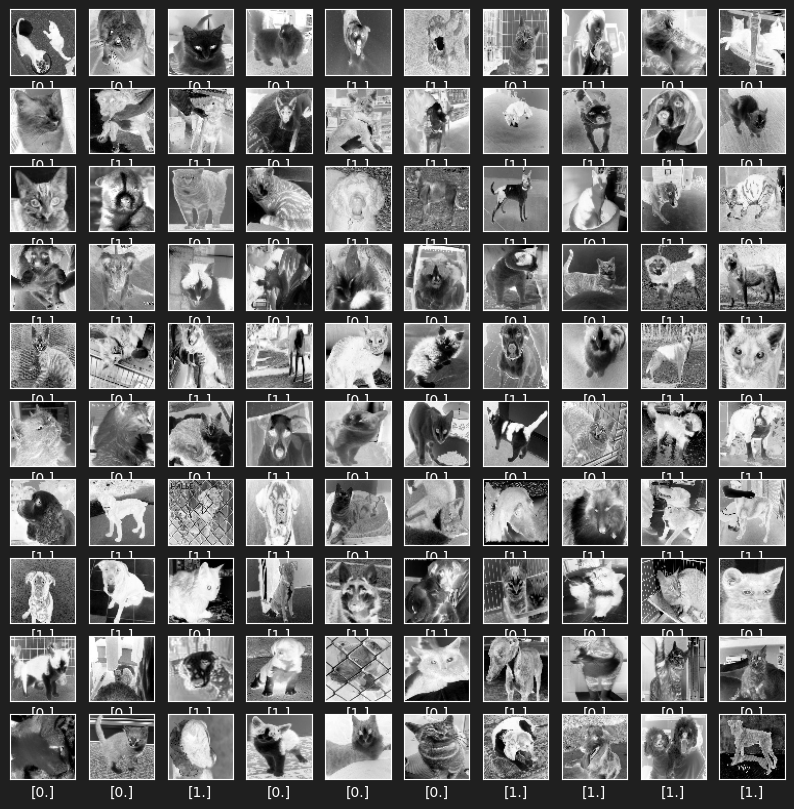

In [81]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])


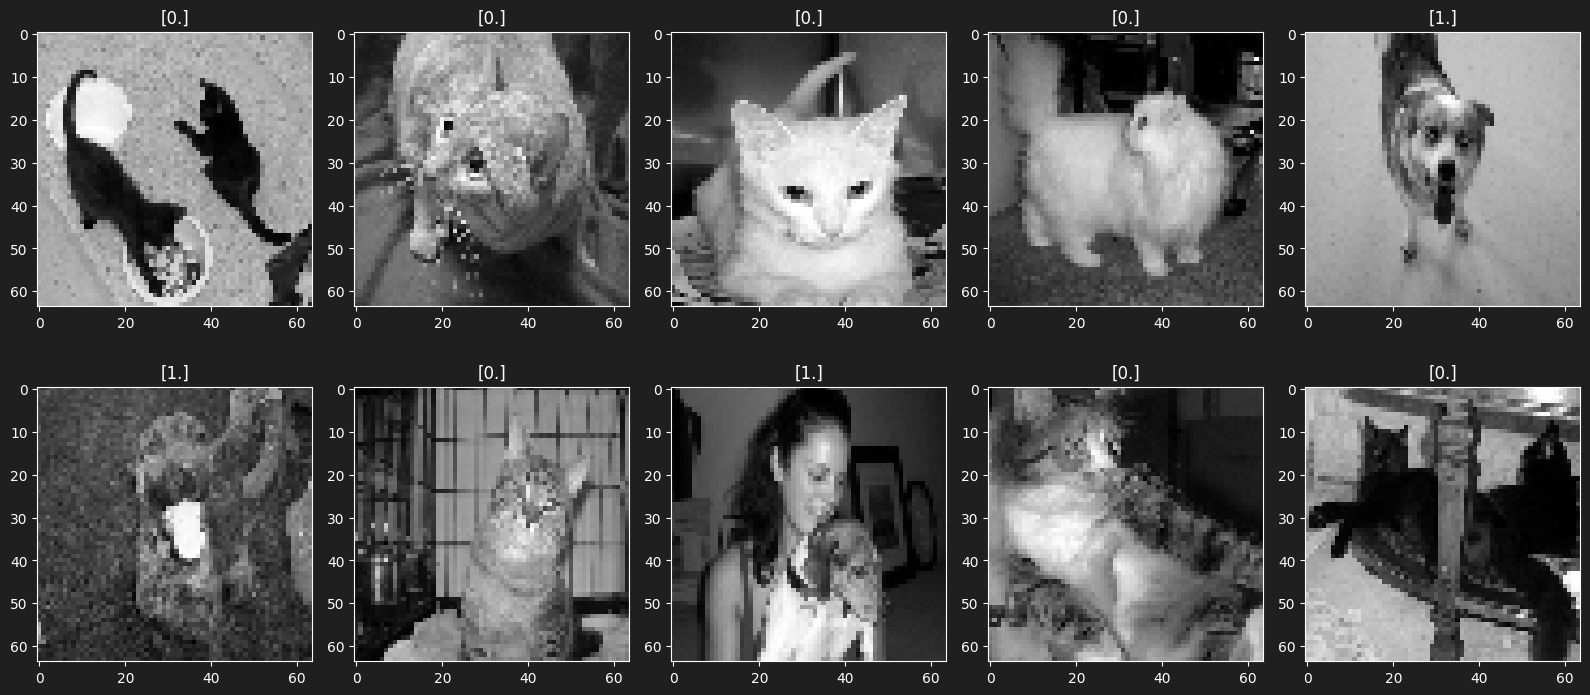

In [82]:
plt.figure(figsize=(16,8))#This creates a new figure for plotting with dimensions 16x8 inches. `figsize` specifies the size of the entire figure.
for i in range(10):
    plt.subplot(2,5,i+1)
    #  Creates a subplot within a grid of size **5x5** (25 slots in total). `i+1` determines the position of the subplot for the current image.
    #Although the subplot grid is set to 5x5, only the first 10 slots are used. 
    # You could adjust the grid size to 2x5 to better fit 10 images.
    plt.imshow(X_train[i],cmap='gray')
    #Sets the title for the current subplot using the `i-th` label from `y_train`.
    #This provides a label or class name corresponding to the displayed image.
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()    

In [83]:
import matplotlib.pyplot as plt

def plot_images(images, labels, num_images=100, grid_size=(2, 5), cmap='gray'):
    """
    Plots a sample of images with their corresponding labels.

    Parameters:
    - images: Array-like, the dataset of images to plot.
    - labels: Array-like, the labels corresponding to the images.
    - num_images: int, number of images to display (default is 10).
    - grid_size: tuple, dimensions of the grid (rows, cols) (default is (2, 5)).
    - cmap: str, color map for displaying images (default is 'gray').
    """
    # Validate inputs
    rows, cols = grid_size
    assert rows * cols >= num_images, "Grid size must accommodate num_images."

    # Create the figure
    plt.figure(figsize=(cols * 3, rows * 3))  # Dynamically adjust size based on grid

    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')  # Hide axes for cleaner visualization

    plt.tight_layout()  # Adjust spacing
    plt.show()


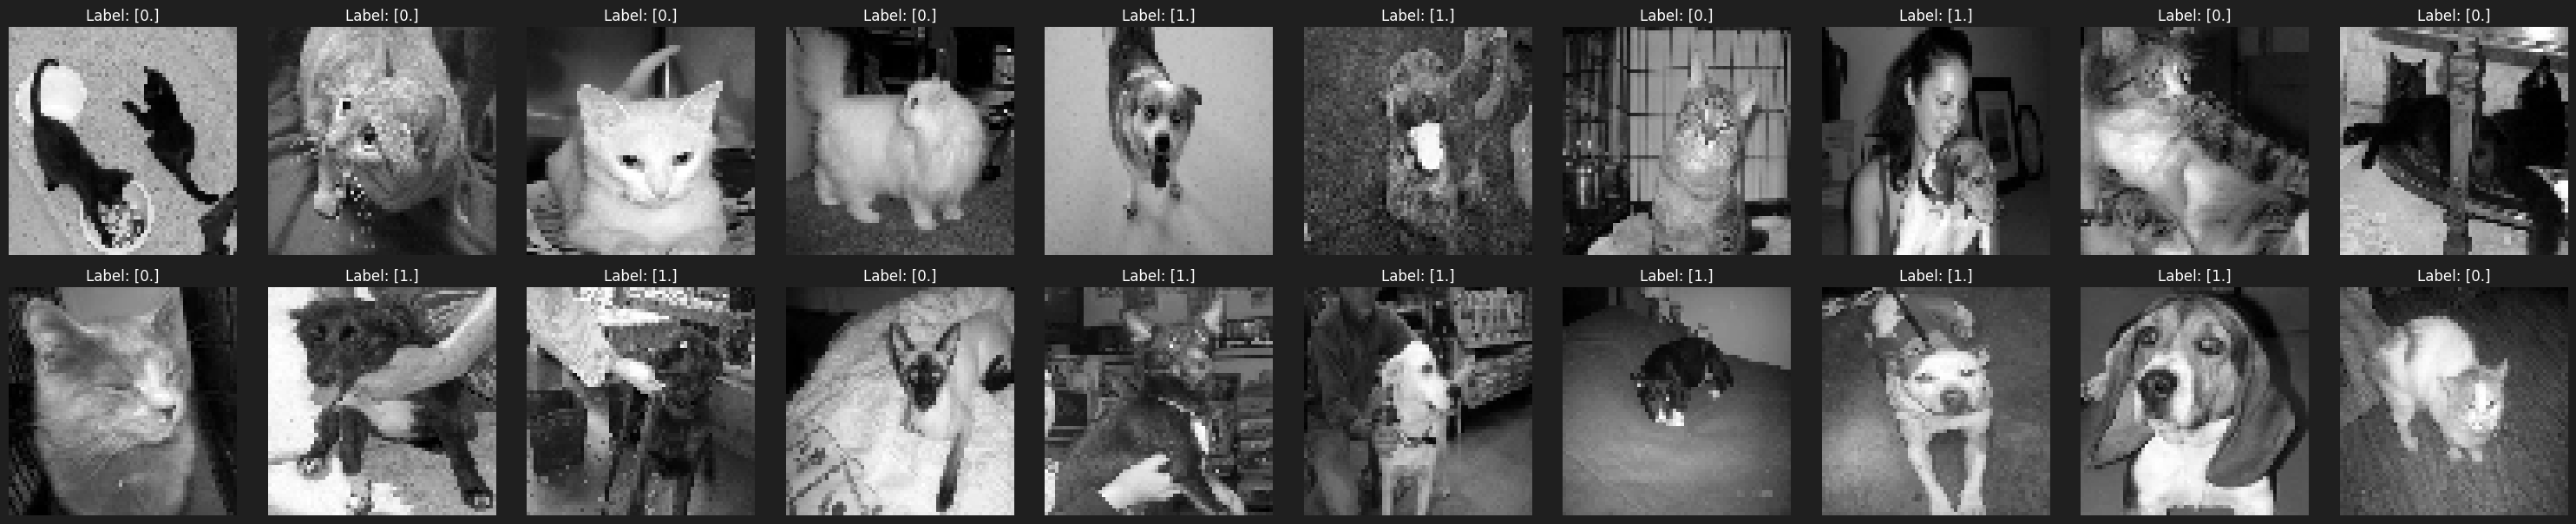

In [84]:
# Assuming X_train and y_train are defined
plot_images(X_train, y_train, num_images=20, grid_size=(1000, 10))


In [85]:
# chaque image est code en 8 bits c a d chaque pixel a une valeur  entre 0 et 255 , ce qu'on va faire on va normaliser ces valeur entre 0-1    chaque pixel est une feature

## Entrainement du Modéle 

On va normaliser notre data par MinMax

In [86]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1) / X_train.max() # standarsing the data

print(X_train_reshape) 
print(X_train_reshape.max())
print(X_train_reshape.min())
# ce sont des pts fondamentaux de Preprocessing X_train_reshaped = X_train.reshape(X_train.shape[0],-1)/X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0],-1)/X_train.max()
print(X_test_reshape) 
print(X_train_reshape.max())
print(z.min())
print(z.max())


[[0.64566929 0.68503937 0.64173228 ... 0.34251969 0.70866142 0.15354331]
 [0.16535433 0.16929134 0.15354331 ... 0.21653543 0.20472441 0.21653543]
 [0.10629921 0.1023622  0.11417323 ... 0.53149606 0.55511811 0.47637795]
 ...
 [0.18503937 0.26771654 0.55905512 ... 0.79527559 0.79527559 0.7992126 ]
 [0.99212598 0.99212598 0.99212598 ... 0.2519685  0.25984252 0.23228346]
 [0.48031496 0.49606299 0.51181102 ... 0.63385827 0.62992126 0.62992126]]
1.0
0.0
[[0.18503937 0.18503937 0.2007874  ... 0.61023622 0.61417323 0.60629921]
 [0.51181102 0.58267717 0.49212598 ... 0.4488189  0.30314961 0.46062992]
 [0.8503937  0.52362205 0.78740157 ... 0.75984252 0.65354331 0.69685039]
 ...
 [0.15748031 0.2007874  0.78346457 ... 0.53937008 0.84251969 0.49212598]
 [0.81102362 0.81102362 0.81102362 ... 0.44094488 0.43700787 0.40944882]
 [0.43307087 0.3976378  0.46062992 ... 0.4015748  0.13385827 0.21653543]]
1.0
-86.64198775821067
86.64198775821067


  1%|          | 12/1000 [00:00<00:08, 119.61it/s]

94.18040929661666
94.18040929661666
[[1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99843258e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999999e-01]
 [9.99984201e-01]
 [9.99999995e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99993736e-01]
 [9.99999990e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999991e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999133e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.84126478e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999895e-01]
 [9.99999951e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.70543273e-03]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999987e-01]
 [1.00000000e+00]
 [9.99999998e-01]
 [9.99998109e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.000000

  3%|▎         | 30/1000 [00:00<00:06, 152.48it/s]

54.27347963403416
54.194550047305405
54.11802139396919
54.04322398097214
53.969676809971034


  5%|▍         | 46/1000 [00:00<00:06, 136.96it/s]

53.89703603874066
53.89703603874066
[[1.00000000e+00]
 [5.81827460e-02]
 [2.32031457e-06]
 [3.13290072e-06]
 [1.91160811e-04]
 [9.71778505e-01]
 [1.85807353e-03]
 [2.26501636e-05]
 [6.38000115e-05]
 [9.99955986e-01]
 [3.27869458e-01]
 [9.86335591e-01]
 [1.00000000e+00]
 [9.60748381e-04]
 [8.09738055e-01]
 [4.62066687e-03]
 [7.64094864e-04]
 [9.31769779e-05]
 [9.99994013e-01]
 [1.22932030e-04]
 [9.99999999e-01]
 [9.99839170e-01]
 [1.04481148e-02]
 [1.83139378e-10]
 [9.99616791e-01]
 [2.17243730e-01]
 [6.82353807e-06]
 [2.14844543e-02]
 [9.99558347e-01]
 [1.55747828e-08]
 [2.82178757e-02]
 [4.01454912e-01]
 [9.99999978e-01]
 [9.99999947e-01]
 [1.40154510e-08]
 [3.22070457e-06]
 [2.44222189e-01]
 [1.54375571e-02]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99855241e-01]
 [4.01532517e-15]
 [9.99982315e-01]
 [9.99996412e-01]
 [9.99999948e-01]
 [1.62252920e-04]
 [2.86089513e-02]
 [1.26345565e-05]
 [9.99867523e-01]
 [1.60593727e-01]
 [7.21665224e-08]
 [9.99999032e-01]
 [9.91377137e-01]
 [1.110523

  8%|▊         | 79/1000 [00:00<00:06, 148.19it/s]

52.30570548951856
52.23950807104285
52.17361497285843
52.10802978638704
52.04275538972219
51.97779398223843
51.913147116192874
51.848815723789905
51.848815723789905
[[1.00000000e+00]
 [2.96234225e-01]
 [4.01889898e-05]
 [6.62376548e-05]
 [2.19490426e-04]
 [9.90657961e-01]
 [8.69239967e-03]
 [3.02397710e-05]
 [9.96827316e-05]
 [9.99638187e-01]
 [8.22617906e-01]
 [9.56081450e-01]
 [1.00000000e+00]
 [2.62153710e-03]
 [8.04216833e-01]
 [1.23275329e-02]
 [8.45003202e-04]
 [6.71082215e-04]
 [9.99997366e-01]
 [1.91144499e-03]
 [9.99999993e-01]
 [9.99640120e-01]
 [8.78259250e-03]
 [2.11596489e-10]
 [9.98334785e-01]
 [2.91997392e-01]
 [1.22200067e-05]
 [2.22348964e-02]
 [9.99411348e-01]
 [7.72393000e-09]
 [8.69553001e-02]
 [4.97593452e-01]
 [9.99999945e-01]
 [9.99999883e-01]
 [1.03149081e-07]
 [6.47490822e-06]
 [4.29819942e-01]
 [8.15439012e-03]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99883632e-01]
 [1.11659216e-14]
 [9.99974322e-01]
 [9.99996564e-01]
 [9.99999578e-01]
 [9.28686362e-05]
 [9.192

 11%|█         | 111/1000 [00:00<00:06, 139.29it/s]

50.3344270309331
50.27688567135395
50.21950612672983
50.16228079063962
50.10520243873729
50.048264275939815
50.048264275939815
[[1.00000000e+00]
 [6.82380266e-01]
 [3.69464528e-04]
 [8.22647821e-04]
 [2.97741695e-04]
 [9.96264118e-01]
 [2.99588592e-02]
 [3.29225516e-05]
 [1.26861095e-04]
 [9.98148265e-01]
 [9.63544408e-01]
 [9.11250550e-01]
 [9.99999999e-01]
 [5.54098317e-03]
 [8.07874062e-01]
 [2.59007726e-02]
 [9.47379410e-04]
 [3.52254523e-03]
 [9.99998391e-01]
 [1.61906343e-02]
 [9.99999968e-01]
 [9.99303892e-01]
 [8.32171028e-03]
 [3.07420955e-10]
 [9.94890621e-01]
 [3.91183676e-01]
 [2.08089434e-05]
 [2.61177604e-02]
 [9.99127008e-01]
 [5.09514117e-09]
 [2.08134362e-01]
 [5.88882974e-01]
 [9.99999882e-01]
 [9.99999755e-01]
 [5.82544338e-07]
 [1.02429442e-05]
 [5.78197639e-01]
 [4.91370128e-03]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99901434e-01]
 [3.08065517e-14]
 [9.99973436e-01]
 [9.99996702e-01]
 [9.99997670e-01]
 [5.80891507e-05]
 [2.07262494e-01]
 [1.50023603e-03]
 [9.99135

 13%|█▎        | 129/1000 [00:00<00:05, 150.67it/s]

48.878928819259016
48.8245136563444
48.77023721069598
48.71610410371735
48.66211890155556
48.60828605089021
48.55460981939429
48.50109424197397
48.44774307367758
48.39455974992677
48.39455974992677
[[1.00000000e+00]
 [8.85555451e-01]
 [1.78684633e-03]
 [5.90154088e-03]
 [4.15534474e-04]
 [9.98109627e-01]
 [7.31505336e-02]
 [2.95928251e-05]
 [1.25988409e-04]
 [9.93552137e-01]
 [9.89047167e-01]
 [8.70485542e-01]
 [9.99999997e-01]
 [8.61950862e-03]
 [8.11441928e-01]
 [4.30481766e-02]
 [1.01170115e-03]
 [1.28006711e-02]
 [9.99998593e-01]
 [7.12120934e-02]
 [9.99999865e-01]
 [9.98759854e-01]
 [8.01803035e-03]
 [4.77405278e-10]
 [9.87832806e-01]
 [4.81372935e-01]
 [3.12427748e-05]
 [3.25980240e-02]
 [9.98524508e-01]
 [4.09255086e-09]
 [3.65460815e-01]
 [6.54481683e-01]
 [9.99999768e-01]
 [9.99999499e-01]
 [2.33396870e-06]
 [1.24085867e-05]
 [6.45648098e-01]
 [3.02500896e-03]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99904337e-01]
 [7.75179939e-14]
 [9.99977295e-01]
 [9.99996691e-01]
 [9.999905

 16%|█▌        | 161/1000 [00:01<00:05, 140.27it/s]

47.31865391593574
47.269315732955356
47.22013552485515
47.17111088165122
47.12223939985516
47.07351869661248
47.024946422759726
46.97652027485975
46.92823800626333
46.88009743723617
46.88009743723617
[[1.00000000e+00]
 [9.55502544e-01]
 [5.59486712e-03]
 [2.74935581e-02]
 [6.05178997e-04]
 [9.98872585e-01]
 [1.39962092e-01]
 [2.41689062e-05]
 [1.07014379e-04]
 [9.83897695e-01]
 [9.95311487e-01]
 [8.52919067e-01]
 [9.99999991e-01]
 [1.13247443e-02]
 [8.19139974e-01]
 [6.18541976e-02]
 [1.07213919e-03]
 [3.60309057e-02]
 [9.99998465e-01]
 [1.86257257e-01]
 [9.99999505e-01]
 [9.98035488e-01]
 [8.00650434e-03]
 [7.71559230e-10]
 [9.76929881e-01]
 [5.67810978e-01]
 [4.43373804e-05]
 [4.42311229e-02]
 [9.97429838e-01]
 [3.85342147e-09]
 [5.18341066e-01]
 [7.06124622e-01]
 [9.99999580e-01]
 [9.99999047e-01]
 [7.34935017e-06]
 [1.28308376e-05]
 [6.66391103e-01]
 [2.01951222e-03]
 [1.00000000e+00]
 [9.99999999e-01]
 [9.99900481e-01]
 [1.83050339e-13]
 [9.99982993e-01]
 [9.99996708e-01]
 [9.9997

 20%|█▉        | 195/1000 [00:01<00:05, 136.89it/s]

45.71828479600219
45.673391260281
45.62861758258299
45.583963893480345
45.53943031977001
45.49501697704403
45.49501697704403
[[1.00000000e+00]
 [9.80345511e-01]
 [1.32785556e-02]
 [9.06181244e-02]
 [9.31505603e-04]
 [9.99251725e-01]
 [2.26371734e-01]
 [1.91235944e-05]
 [8.45899027e-05]
 [9.69561251e-01]
 [9.97412044e-01]
 [8.62875719e-01]
 [9.99999979e-01]
 [1.39372893e-02]
 [8.33077157e-01]
 [8.15236074e-02]
 [1.16367782e-03]
 [8.52368712e-02]
 [9.99998130e-01]
 [3.35835688e-01]
 [9.99998412e-01]
 [9.97258372e-01]
 [8.43437695e-03]
 [1.30376712e-09]
 [9.63791840e-01]
 [6.54694437e-01]
 [6.24021897e-05]
 [6.43317380e-02]
 [9.95690562e-01]
 [4.11696098e-09]
 [6.45622020e-01]
 [7.52938264e-01]
 [9.99999301e-01]
 [9.99998342e-01]
 [1.99101237e-05]
 [1.22949137e-05]
 [6.66238587e-01]
 [1.50557178e-03]
 [1.00000000e+00]
 [9.99999999e-01]
 [9.99895147e-01]
 [4.13169949e-13]
 [9.99988424e-01]
 [9.99996836e-01]
 [9.99927440e-01]
 [2.06103979e-05]
 [4.93119871e-01]
 [1.25372640e-01]
 [9.9437872

 23%|██▎       | 227/1000 [00:01<00:05, 137.42it/s]

28.328372868600567
28.328372868600567
[[9.99996842e-01]
 [9.31744370e-01]
 [1.77092275e-05]
 [9.46792637e-05]
 [9.98864891e-01]
 [9.90067231e-01]
 [9.96798141e-01]
 [9.99996679e-01]
 [9.99920098e-01]
 [3.55684262e-08]
 [3.31581439e-01]
 [9.99997386e-01]
 [9.96969031e-01]
 [9.93187503e-01]
 [9.99995696e-01]
 [8.12013389e-05]
 [4.91538253e-01]
 [9.48850867e-02]
 [1.24663769e-05]
 [7.92246776e-09]
 [2.60836270e-06]
 [8.57103043e-01]
 [6.75468851e-10]
 [9.99878833e-01]
 [9.99999527e-01]
 [9.86301721e-01]
 [9.99998076e-01]
 [4.65768089e-01]
 [9.58039598e-01]
 [2.25011843e-01]
 [9.60894935e-01]
 [8.70221997e-02]
 [9.99930040e-01]
 [4.18686739e-05]
 [2.76418564e-08]
 [1.00000000e+00]
 [9.56062960e-01]
 [7.75591852e-08]
 [8.63284418e-04]
 [5.13352257e-04]
 [2.14653259e-04]
 [9.36275499e-01]
 [9.91653406e-01]
 [9.99999925e-01]
 [9.55058730e-01]
 [9.96940185e-01]
 [4.28364704e-03]
 [1.00000000e+00]
 [9.18452234e-01]
 [2.56457028e-08]
 [7.77467986e-02]
 [9.99998390e-01]
 [1.00000000e+00]
 [2.3038

 24%|██▍       | 242/1000 [00:01<00:05, 127.95it/s]

43.539834694838916
43.50095357841719
43.46218271299625
43.42352174720514
43.42352174720514
[[1.00000000e+00]
 [9.93006964e-01]
 [3.26045731e-02]
 [3.09997649e-01]
 [1.91083737e-03]
 [9.99524869e-01]
 [3.66631474e-01]
 [1.23520194e-05]
 [5.09780814e-05]
 [9.44962800e-01]
 [9.98453563e-01]
 [9.09706699e-01]
 [9.99999921e-01]
 [1.65005386e-02]
 [8.60249367e-01]
 [1.08624515e-01]
 [1.33209333e-03]
 [2.37296038e-01]
 [9.99996833e-01]
 [5.23425626e-01]
 [9.99991036e-01]
 [9.96015335e-01]
 [9.58370576e-03]
 [3.16252802e-09]
 [9.41158750e-01]
 [7.67928810e-01]
 [1.02531074e-04]
 [1.20201281e-01]
 [9.90359134e-01]
 [5.46214413e-09]
 [7.78232398e-01]
 [8.12655384e-01]
 [9.99998538e-01]
 [9.99996262e-01]
 [7.58542752e-05]
 [9.81162778e-06]
 [6.24359650e-01]
 [1.05054743e-03]
 [1.00000000e+00]
 [9.99999997e-01]
 [9.99878671e-01]
 [1.36533980e-12]
 [9.99994316e-01]
 [9.99997050e-01]
 [9.99766693e-01]
 [1.58346693e-05]
 [5.51229804e-01]
 [4.32482530e-01]
 [9.89113726e-01]
 [9.22099372e-02]
 [2.24913

 27%|██▋       | 271/1000 [00:01<00:05, 127.12it/s]

42.63604342493891
42.59964982079772
42.563351531133286
42.52714798419936
42.49103863825427
42.455022982697116
42.41910053884755
42.38327086037877
42.34753353341833
42.31188817633377
42.31188817633377
[[1.00000000e+00]
 [9.95476953e-01]
 [4.32773613e-02]
 [4.49906292e-01]
 [2.80045020e-03]
 [9.99590374e-01]
 [4.27104385e-01]
 [9.58106486e-06]
 [3.64884889e-05]
 [9.36367326e-01]
 [9.98587120e-01]
 [9.38052680e-01]
 [9.99999837e-01]
 [1.64755041e-02]
 [8.76180430e-01]
 [1.18752276e-01]
 [1.42235646e-03]
 [3.51020355e-01]
 [9.99995337e-01]
 [5.76843814e-01]
 [9.99976973e-01]
 [9.95423121e-01]
 [1.02714768e-02]
 [5.20179789e-09]
 [9.27853279e-01]
 [8.12326159e-01]
 [1.30761208e-04]
 [1.64164736e-01]
 [9.85023964e-01]
 [6.78116336e-09]
 [8.21465440e-01]
 [8.37675188e-01]
 [9.99997840e-01]
 [9.99994115e-01]
 [1.41345541e-04]
 [8.01621092e-06]
 [5.80002128e-01]
 [8.80504674e-04]
 [1.00000000e+00]
 [9.99999995e-01]
 [9.99863035e-01]
 [2.47036412e-12]
 [9.99996175e-01]
 [9.99997113e-01]
 [9.9959

 30%|███       | 300/1000 [00:02<00:05, 131.07it/s]

41.584182650345426
41.55051232674524
41.516930653783845
41.48343752330258
41.45003281469448
41.41671639374886
41.38348811166376
41.35034780423284
41.317295291210876
41.28433037586175
41.28433037586175
[[1.00000000e+00]
 [9.96746722e-01]
 [5.09723476e-02]
 [5.58206302e-01]
 [3.90783086e-03]
 [9.99621282e-01]
 [4.68304924e-01]
 [7.67080067e-06]
 [2.63291030e-05]
 [9.33594433e-01]
 [9.98571525e-01]
 [9.59821728e-01]
 [9.99999682e-01]
 [1.56055068e-02]
 [8.90857718e-01]
 [1.24804218e-01]
 [1.50243420e-03]
 [4.61147304e-01]
 [9.99993064e-01]
 [6.00941610e-01]
 [9.99943945e-01]
 [9.95010107e-01]
 [1.08455914e-02]
 [8.24590478e-09]
 [9.13906240e-01]
 [8.43170295e-01]
 [1.61059827e-04]
 [2.09673971e-01]
 [9.77698799e-01]
 [8.44980595e-09]
 [8.48977970e-01]
 [8.56872030e-01]
 [9.99996908e-01]
 [9.99990862e-01]
 [2.37040399e-04]
 [6.41038765e-06]
 [5.28750901e-01]
 [7.48472852e-04]
 [1.00000000e+00]
 [9.99999993e-01]
 [9.99843189e-01]
 [4.07292223e-12]
 [9.99997283e-01]
 [9.99997124e-01]
 [9.993

 33%|███▎      | 331/1000 [00:02<00:05, 130.51it/s]

40.642989896635896
40.642989896635896
[[1.00000000e+00]
 [9.97277407e-01]
 [5.48321308e-02]
 [6.13665172e-01]
 [4.78666221e-03]
 [9.99631360e-01]
 [4.88090872e-01]
 [6.77735337e-06]
 [2.15406241e-05]
 [9.34453091e-01]
 [9.98514570e-01]
 [9.70600488e-01]
 [9.99999521e-01]
 [1.48722764e-02]
 [9.00005813e-01]
 [1.27511945e-01]
 [1.55772699e-03]
 [5.29148573e-01]
 [9.99991063e-01]
 [6.07987353e-01]
 [9.99901597e-01]
 [9.94868717e-01]
 [1.12104655e-02]
 [1.10368388e-08]
 [9.04187662e-01]
 [8.59228736e-01]
 [1.83283472e-04]
 [2.39143421e-01]
 [9.71771131e-01]
 [9.77527059e-09]
 [8.62165149e-01]
 [8.67906461e-01]
 [9.99996150e-01]
 [9.99987879e-01]
 [3.21652193e-04]
 [5.53609453e-06]
 [4.95080813e-01]
 [6.79407695e-04]
 [1.00000000e+00]
 [9.99999990e-01]
 [9.99828638e-01]
 [5.45297762e-12]
 [9.99997777e-01]
 [9.99997122e-01]
 [9.99105396e-01]
 [1.23607290e-05]
 [5.51842379e-01]
 [7.93296133e-01]
 [9.75248144e-01]
 [9.85591690e-02]
 [5.62412682e-07]
 [9.99996356e-01]
 [9.76064830e-01]
 [8.7758

 36%|███▋      | 364/1000 [00:02<00:04, 140.45it/s]

39.76979325533427
39.7408152618132
39.7408152618132
[[1.00000000e+00]
 [9.97818078e-01]
 [5.95041628e-02]
 [6.78034610e-01]
 [6.34857371e-03]
 [9.99637025e-01]
 [5.09922725e-01]
 [5.84201745e-06]
 [1.64518878e-05]
 [9.38348332e-01]
 [9.98385059e-01]
 [9.81978349e-01]
 [9.99999151e-01]
 [1.37887864e-02]
 [9.12585035e-01]
 [1.30486308e-01]
 [1.64768397e-03]
 [6.20456312e-01]
 [9.99987278e-01]
 [6.11310116e-01]
 [9.99781366e-01]
 [9.94859741e-01]
 [1.17669197e-02]
 [1.66967086e-08]
 [8.89009291e-01]
 [8.78955734e-01]
 [2.20927580e-04]
 [2.80642121e-01]
 [9.61595898e-01]
 [1.21138535e-08]
 [8.77167910e-01]
 [8.82752853e-01]
 [9.99994805e-01]
 [9.99981865e-01]
 [4.86964371e-04]
 [4.50725338e-06]
 [4.48980921e-01]
 [5.99101762e-04]
 [1.00000000e+00]
 [9.99999985e-01]
 [9.99805769e-01]
 [8.04298193e-12]
 [9.99998289e-01]
 [9.99997125e-01]
 [9.98656873e-01]
 [1.18574599e-05]
 [5.43957642e-01]
 [8.51044209e-01]
 [9.68363466e-01]
 [9.92435187e-02]
 [7.31259636e-07]
 [9.99994382e-01]
 [9.72783368

 39%|███▉      | 394/1000 [00:02<00:04, 134.25it/s]

[[1.00000000e+00]
 [9.98176461e-01]
 [6.33763008e-02]
 [7.26190732e-01]
 [8.22623491e-03]
 [9.99635083e-01]
 [5.25330773e-01]
 [5.23615198e-06]
 [1.30261644e-05]
 [9.43658013e-01]
 [9.98219560e-01]
 [9.89010399e-01]
 [9.99998569e-01]
 [1.27907340e-02]
 [9.23544466e-01]
 [1.32618547e-01]
 [1.74202064e-03]
 [6.97304816e-01]
 [9.99982472e-01]
 [6.09961303e-01]
 [9.99540378e-01]
 [9.95040230e-01]
 [1.23363024e-02]
 [2.44578065e-08]
 [8.73190233e-01]
 [8.94828683e-01]
 [2.64861254e-04]
 [3.18117109e-01]
 [9.50175265e-01]
 [1.49035456e-08]
 [8.88538817e-01]
 [8.95779858e-01]
 [9.99993204e-01]
 [9.99973577e-01]
 [7.05893370e-04]
 [3.74372809e-06]
 [4.09748943e-01]
 [5.40041956e-04]
 [1.00000000e+00]
 [9.99999978e-01]
 [9.99781902e-01]
 [1.13295089e-11]
 [9.99998624e-01]
 [9.99997135e-01]
 [9.98063242e-01]
 [1.16891465e-05]
 [5.35776946e-01]
 [8.88317968e-01]
 [9.60863063e-01]
 [9.95101095e-02]
 [9.18145006e-07]
 [9.99991568e-01]
 [9.69382431e-01]
 [4.42771760e-04]
 [3.67951219e-01]
 [9.917452

 41%|████      | 411/1000 [00:02<00:04, 136.67it/s]

38.28148213680092
38.25627894416662
38.231135848479184
38.206052494138106
38.18102852700631
38.156063594615986
38.13115734636221
38.13115734636221
[[1.00000000e+00]
 [9.98426721e-01]
 [6.68156440e-02]
 [7.63073283e-01]
 [1.04283130e-02]
 [9.99627992e-01]
 [5.36708617e-01]
 [4.85105627e-06]
 [1.06457076e-05]
 [9.49115895e-01]
 [9.98031527e-01]
 [9.93216739e-01]
 [9.99997705e-01]
 [1.18890072e-02]
 [9.32854349e-01]
 [1.34260258e-01]
 [1.83518785e-03]
 [7.59882239e-01]
 [9.99976568e-01]
 [6.06524664e-01]
 [9.99086329e-01]
 [9.95341883e-01]
 [1.29132631e-02]
 [3.45853559e-08]
 [8.56947913e-01]
 [9.07789428e-01]
 [3.16394306e-04]
 [3.51272559e-01]
 [9.37807317e-01]
 [1.81763268e-08]
 [8.97684789e-01]
 [9.07076129e-01]
 [9.99991342e-01]
 [9.99962525e-01]
 [9.84992384e-04]
 [3.17303145e-06]
 [3.77784751e-01]
 [4.96633391e-04]
 [1.00000000e+00]
 [9.99999969e-01]
 [9.99757101e-01]
 [1.53963437e-11]
 [9.99998846e-01]
 [9.99997146e-01]
 [9.97301368e-01]
 [1.17820558e-05]
 [5.27842348e-01]
 [9.132

 44%|████▍     | 443/1000 [00:03<00:03, 140.01it/s]

37.503108234031174
37.47966422810142
37.45627030729767
37.432926215402475
37.40963169976669
37.40963169976669
[[1.00000000e+00]
 [9.98608022e-01]
 [7.00695589e-02]
 [7.91868328e-01]
 [1.29223120e-02]
 [9.99617154e-01]
 [5.45560329e-01]
 [4.62505706e-06]
 [8.94031492e-06]
 [9.54070904e-01]
 [9.97831531e-01]
 [9.95710345e-01]
 [9.99996474e-01]
 [1.10780172e-02]
 [9.40631232e-01]
 [1.35719566e-01]
 [1.92250595e-03]
 [8.09817473e-01]
 [9.99969527e-01]
 [6.02436850e-01]
 [9.98276998e-01]
 [9.95706475e-01]
 [1.34794459e-02]
 [4.71727076e-08]
 [8.40344935e-01]
 [9.18346580e-01]
 [3.76706910e-04]
 [3.79732105e-01]
 [9.24772513e-01]
 [2.19366037e-08]
 [9.05319692e-01]
 [9.16730331e-01]
 [9.99989198e-01]
 [9.99948165e-01]
 [1.32856488e-03]
 [2.74198145e-06]
 [3.52526119e-01]
 [4.64012910e-04]
 [1.00000000e+00]
 [9.99999958e-01]
 [9.99731125e-01]
 [2.02921349e-11]
 [9.99998993e-01]
 [9.99997150e-01]
 [9.96341439e-01]
 [1.20712903e-05]
 [5.20537382e-01]
 [9.30413327e-01]
 [9.44707172e-01]
 [9.9147

 47%|████▋     | 474/1000 [00:03<00:03, 135.63it/s]

36.79858915449279
36.77659371576649
36.75464193408328
36.73273364807995
36.73273364807995
[[1.00000000e+00]
 [9.98743679e-01]
 [7.33686312e-02]
 [8.14738660e-01]
 [1.56510391e-02]
 [9.99603625e-01]
 [5.52982198e-01]
 [4.52632330e-06]
 [7.69110744e-06]
 [9.58320566e-01]
 [9.97629807e-01]
 [9.97203245e-01]
 [9.99994791e-01]
 [1.03581128e-02]
 [9.47095387e-01]
 [1.37288880e-01]
 [2.00169808e-03]
 [8.49356968e-01]
 [9.99961395e-01]
 [5.98710352e-01]
 [9.96904551e-01]
 [9.96096977e-01]
 [1.40228663e-02]
 [6.21711432e-08]
 [8.23388267e-01]
 [9.26946362e-01]
 [4.47371905e-04]
 [4.03239645e-01]
 [9.11392951e-01]
 [2.61727706e-08]
 [9.11877577e-01]
 [9.24945790e-01]
 [9.99986744e-01]
 [9.99929913e-01]
 [1.74044866e-03]
 [2.41466878e-06]
 [3.33277423e-01]
 [4.39035793e-04]
 [1.00000000e+00]
 [9.99999945e-01]
 [9.99703894e-01]
 [2.60286846e-11]
 [9.99999087e-01]
 [9.99997140e-01]
 [9.95145059e-01]
 [1.25174698e-05]
 [5.14364698e-01]
 [9.42718204e-01]
 [9.36271958e-01]
 [9.84439615e-02]
 [1.567909

 50%|█████     | 503/1000 [00:03<00:03, 128.34it/s]

36.28244573323708
36.261458070635975
36.24051078980861
36.2196037775029
36.19873692199078
36.17791011303049
36.15712324182728
36.13637620099555
36.115668884520176
36.09500118771804
36.09500118771804
[[1.00000000e+00]
 [9.98847462e-01]
 [7.68457996e-02]
 [8.33011861e-01]
 [1.85464550e-02]
 [9.99588113e-01]
 [5.59689995e-01]
 [4.53887142e-06]
 [6.75855581e-06]
 [9.61899241e-01]
 [9.97434201e-01]
 [9.98116058e-01]
 [9.99992572e-01]
 [9.72581856e-03]
 [9.52482449e-01]
 [1.39164222e-01]
 [2.07199405e-03]
 [8.80551205e-01]
 [9.99952300e-01]
 [5.95815992e-01]
 [9.94685405e-01]
 [9.96492067e-01]
 [1.45371444e-02]
 [7.93972585e-08]
 [8.06193908e-01]
 [9.33981301e-01]
 [5.30382736e-04]
 [4.21812695e-01]
 [8.97997358e-01]
 [3.08732704e-08]
 [9.17608078e-01]
 [9.31941444e-01]
 [9.99983958e-01]
 [9.99907205e-01]
 [2.22331785e-03]
 [2.16539054e-06]
 [3.19286069e-01]
 [4.19969646e-04]
 [1.00000000e+00]
 [9.99999929e-01]
 [9.99675512e-01]
 [3.25818734e-11]
 [9.99999143e-01]
 [9.99997112e-01]
 [9.93670

 53%|█████▎    | 531/1000 [00:03<00:03, 127.68it/s]

35.82334549894603
35.82334549894603
[[1.00000000e+00]
 [9.98903041e-01]
 [7.92674075e-02]
 [8.43036313e-01]
 [2.05357886e-02]
 [9.99576860e-01]
 [5.63963954e-01]
 [4.60468433e-06]
 [6.26447101e-06]
 [9.63969139e-01]
 [9.97309228e-01]
 [9.98525859e-01]
 [9.99990761e-01]
 [9.34847209e-03]
 [9.55578676e-01]
 [1.40629346e-01]
 [2.11388627e-03]
 [8.97545786e-01]
 [9.99945783e-01]
 [5.94326022e-01]
 [9.92562309e-01]
 [9.96751387e-01]
 [1.48623401e-02]
 [9.19719203e-08]
 [7.94744847e-01]
 [9.37964081e-01]
 [5.93710377e-04]
 [4.31610581e-01]
 [8.89196405e-01]
 [3.42655379e-08]
 [9.21035836e-01]
 [9.36019834e-01]
 [9.99981912e-01]
 [9.99889358e-01]
 [2.58465792e-03]
 [2.03279987e-06]
 [3.12486957e-01]
 [4.10079280e-04]
 [1.00000000e+00]
 [9.99999917e-01]
 [9.99656033e-01]
 [3.73791119e-11]
 [9.99999163e-01]
 [9.99997083e-01]
 [9.92512852e-01]
 [1.35736871e-05]
 [5.07433765e-01]
 [9.56528133e-01]
 [9.22084789e-01]
 [9.64724840e-02]
 [1.96556168e-06]
 [9.99960358e-01]
 [9.55180735e-01]
 [1.603442

 54%|█████▍    | 544/1000 [00:04<00:03, 125.06it/s]

35.72367465355803
35.71883457604196
35.713986454777
35.709130349383514
35.70426631889541
35.6993944217755
35.69451471593019
35.68962725872398
35.68473210699371
35.67982931706247
35.67982931706247
[[1.00000000e+00]
 [9.98969916e-01]
 [8.29869749e-02]
 [8.55239744e-01]
 [2.35665980e-02]
 [9.99558738e-01]
 [5.70216820e-01]
 [4.78559251e-06]
 [5.66301701e-06]
 [9.66691535e-01]
 [9.97130332e-01]
 [9.98952636e-01]
 [9.99987514e-01]
 [8.83999516e-03]
 [9.59608233e-01]
 [1.43154568e-01]
 [2.16951460e-03]
 [9.18367824e-01]
 [9.99935444e-01]
 [5.92476462e-01]
 [9.88116250e-01]
 [9.97127166e-01]
 [1.53246298e-02]
 [1.12197109e-07]
 [7.77928623e-01]
 [9.43080047e-01]
 [7.02579352e-04]
 [4.42858629e-01]
 [8.76331657e-01]
 [3.97601910e-08]
 [9.25650001e-01]
 [9.41375775e-01]
 [9.99978567e-01]
 [9.99858292e-01]
 [3.18303609e-03]
 [1.87290285e-06]
 [3.05511536e-01]
 [3.99092953e-04]
 [1.00000000e+00]
 [9.99999897e-01]
 [9.99626096e-01]
 [4.51722537e-11]
 [9.99999173e-01]
 [9.99997024e-01]
 [9.90493948

 58%|█████▊    | 580/1000 [00:04<00:02, 143.86it/s]

24.12145972432472
24.12145972432472
[[9.99997718e-01]
 [2.48903953e-02]
 [1.24089055e-04]
 [1.05563814e-04]
 [9.42413215e-01]
 [9.97854230e-01]
 [9.53999432e-01]
 [9.97713465e-01]
 [9.73135581e-01]
 [7.41523621e-07]
 [9.02166982e-01]
 [9.99987047e-01]
 [9.99204668e-01]
 [9.91046683e-01]
 [9.84524744e-01]
 [2.61511118e-05]
 [8.86545277e-01]
 [2.32935979e-01]
 [2.21327404e-05]
 [8.44189775e-07]
 [6.31932737e-03]
 [9.80394280e-01]
 [4.11220367e-07]
 [9.98596118e-01]
 [9.99999217e-01]
 [9.99742621e-01]
 [9.56473773e-01]
 [6.23007152e-01]
 [9.13114450e-01]
 [1.98041001e-02]
 [9.31689501e-01]
 [1.59093292e-01]
 [9.67467251e-01]
 [9.88065733e-06]
 [1.19585019e-07]
 [1.00000000e+00]
 [4.11582521e-01]
 [2.00724510e-08]
 [4.05979465e-04]
 [2.32836018e-03]
 [9.09895370e-03]
 [8.19630898e-01]
 [9.90258034e-01]
 [9.99999846e-01]
 [9.53649168e-01]
 [9.77405325e-01]
 [3.64576964e-03]
 [9.99955995e-01]
 [9.47065761e-01]
 [3.65699415e-06]
 [7.12604175e-02]
 [9.99992790e-01]
 [9.99999975e-01]
 [1.014276

 61%|██████    | 611/1000 [00:04<00:02, 138.22it/s]

35.41038775508381
35.405146186729496
35.39989958162939
35.39464798143798
35.389391427667746
35.38412996169051
35.37886362473749
35.37359245789986
35.37359245789986
[[1.00000000e+00]
 [9.99057150e-01]
 [9.02167308e-02]
 [8.71101406e-01]
 [2.96642918e-02]
 [9.99518128e-01]
 [5.82332550e-01]
 [5.43425874e-06]
 [4.79624719e-06]
 [9.71093539e-01]
 [9.96796460e-01]
 [9.99423484e-01]
 [9.99979065e-01]
 [7.98920864e-03]
 [9.65929450e-01]
 [1.49194624e-01]
 [2.25650771e-03]
 [9.47312004e-01]
 [9.99913127e-01]
 [5.88585987e-01]
 [9.73192682e-01]
 [9.97805028e-01]
 [1.61729171e-02]
 [1.56099113e-07]
 [7.47312966e-01]
 [9.50988362e-01]
 [9.80783548e-04]
 [4.55464148e-01]
 [8.52096230e-01]
 [5.24058883e-08]
 [9.33218512e-01]
 [9.49829830e-01]
 [9.99970953e-01]
 [9.99780266e-01]
 [4.55230887e-03]
 [1.65260867e-06]
 [3.00710936e-01]
 [3.89644773e-04]
 [1.00000000e+00]
 [9.99999846e-01]
 [9.99564052e-01]
 [6.27170749e-11]
 [9.99999131e-01]
 [9.99996844e-01]
 [9.85383168e-01]
 [1.65194537e-05]
 [5.0438

 64%|██████▍   | 642/1000 [00:04<00:02, 136.69it/s]

35.261853541538414
35.25648623048694
35.25111499589923
35.245739875452394
35.24036090667317
35.23497812693751
35.2295915734693
35.22420128333956
35.21880729346567
35.21340964061038
35.21340964061038
[[1.00000000e+00]
 [9.99082732e-01]
 [9.34998798e-02]
 [8.75624359e-01]
 [3.26895793e-02]
 [9.99495606e-01]
 [5.88217068e-01]
 [5.90446192e-06]
 [4.47392040e-06]
 [9.72883906e-01]
 [9.96637376e-01]
 [9.99555265e-01]
 [9.99973896e-01]
 [7.63091030e-03]
 [9.68415516e-01]
 [1.52583485e-01]
 [2.28884829e-03]
 [9.57232254e-01]
 [9.99901306e-01]
 [5.86011682e-01]
 [9.62014339e-01]
 [9.98097654e-01]
 [1.65658097e-02]
 [1.78960522e-07]
 [7.34140615e-01]
 [9.54085525e-01]
 [1.15640047e-03]
 [4.58039663e-01]
 [8.40749876e-01]
 [5.96881992e-08]
 [9.36301407e-01]
 [9.53157541e-01]
 [9.99966731e-01]
 [9.99733369e-01]
 [5.30116068e-03]
 [1.57679180e-06]
 [3.01819299e-01]
 [3.90459935e-04]
 [1.00000000e+00]
 [9.99999814e-01]
 [9.99532113e-01]
 [7.23952201e-11]
 [9.99999083e-01]
 [9.99996726e-01]
 [9.82284

 67%|██████▋   | 673/1000 [00:04<00:02, 135.13it/s]

[[1.00000000e+00]
 [9.99094487e-01]
 [9.55340575e-02]
 [8.77652894e-01]
 [3.46900042e-02]
 [9.99479761e-01]
 [5.92089252e-01]
 [6.27592622e-06]
 [4.28854919e-06]
 [9.73946727e-01]
 [9.96533532e-01]
 [9.99621003e-01]
 [9.99970124e-01]
 [7.41381414e-03]
 [9.69873584e-01]
 [1.54946643e-01]
 [2.30665235e-03]
 [9.62633625e-01]
 [9.99893233e-01]
 [5.84025685e-01]
 [9.53021455e-01]
 [9.98274232e-01]
 [1.68170459e-02]
 [1.94257399e-07]
 [7.26216595e-01]
 [9.55906875e-01]
 [1.28934115e-03]
 [4.58686354e-01]
 [8.33470295e-01]
 [6.49425805e-08]
 [9.38140576e-01]
 [9.55110846e-01]
 [9.99963778e-01]
 [9.99699268e-01]
 [5.81627251e-03]
 [1.53553394e-06]
 [3.03590790e-01]
 [3.92812176e-04]
 [1.00000000e+00]
 [9.99999791e-01]
 [9.99510547e-01]
 [7.91673126e-11]
 [9.99999042e-01]
 [9.99996636e-01]
 [9.80019731e-01]
 [1.87929253e-05]
 [5.05896092e-01]
 [9.74131992e-01]
 [8.87372585e-01]
 [8.87849323e-02]
 [3.27798678e-06]
 [9.99873138e-01]
 [9.44164959e-01]
 [1.00150715e-04]
 [9.02947056e-01]
 [9.831531

 71%|███████   | 709/1000 [00:05<00:01, 148.29it/s]

23.508140261502128
23.508140261502128
[[9.99997898e-01]
 [1.02068994e-02]
 [1.54216314e-04]
 [1.03077388e-04]
 [9.13645812e-01]
 [9.98297307e-01]
 [9.12815196e-01]
 [9.90166724e-01]
 [9.18661473e-01]
 [1.36272073e-06]
 [9.23342639e-01]
 [9.99986617e-01]
 [9.99329707e-01]
 [9.89554865e-01]
 [9.50873189e-01]
 [2.80984958e-05]
 [9.23524253e-01]
 [3.09243588e-01]
 [2.87253273e-05]
 [1.31467341e-06]
 [2.51069487e-02]
 [9.88584680e-01]
 [1.50033236e-06]
 [9.98801223e-01]
 [9.99998855e-01]
 [9.99779958e-01]
 [7.63196047e-01]
 [6.13030134e-01]
 [8.80675442e-01]
 [1.25369486e-02]
 [9.27046197e-01]
 [2.24876079e-01]
 [9.04348668e-01]
 [7.91977379e-06]
 [2.76253932e-07]
 [1.00000000e+00]
 [3.27553348e-01]
 [2.28334818e-08]
 [4.26410033e-04]
 [2.91027835e-03]
 [1.69015236e-02]
 [8.09336184e-01]
 [9.91006161e-01]
 [9.99999724e-01]
 [9.44802016e-01]
 [9.63404664e-01]
 [4.56215311e-03]
 [9.99663847e-01]
 [9.30071212e-01]
 [7.61673449e-06]
 [6.49473991e-02]
 [9.99988458e-01]
 [9.99999919e-01]
 [9.4327

 72%|███████▎  | 725/1000 [00:05<00:02, 133.47it/s]

34.76149742981951
34.75590691964519
34.7503152060443
34.7447223102838
34.73912825343963
34.73353305639676
34.727936739849405
34.72233932430155
34.71674083006712
34.71674083006712
[[1.00000000e+00]
 [9.99109048e-01]
 [1.01781171e-01]
 [8.80069025e-01]
 [4.15710941e-02]
 [9.99419121e-01]
 [6.05472332e-01]
 [7.99791559e-06]
 [3.78214880e-06]
 [9.76936169e-01]
 [9.96185190e-01]
 [9.99766906e-01]
 [9.99955115e-01]
 [6.78091497e-03]
 [9.73977146e-01]
 [1.63754470e-01]
 [2.34833729e-03]
 [9.76129010e-01]
 [9.99864274e-01]
 [5.75866573e-01]
 [9.11654465e-01]
 [9.98780329e-01]
 [1.76281071e-02]
 [2.46319996e-07]
 [7.03448339e-01]
 [9.61092480e-01]
 [1.87295113e-03]
 [4.55572445e-01]
 [8.09844178e-01]
 [8.61204146e-08]
 [9.43482555e-01]
 [9.60650992e-01]
 [9.99952665e-01]
 [9.99562927e-01]
 [7.67093898e-03]
 [1.43595231e-06]
 [3.15104340e-01]
 [4.11108787e-04]
 [1.00000000e+00]
 [9.99999691e-01]
 [9.99434066e-01]
 [1.04849699e-10]
 [9.99998834e-01]
 [9.99996257e-01]
 [9.70861913e-01]
 [2.2781208

 76%|███████▌  | 760/1000 [00:05<00:01, 150.57it/s]

23.280984824511062
23.280984824511062
[[9.99997974e-01]
 [7.38251601e-03]
 [1.66068795e-04]
 [1.04444938e-04]
 [9.02080122e-01]
 [9.98398240e-01]
 [8.89118551e-01]
 [9.81608606e-01]
 [8.71073017e-01]
 [1.73502364e-06]
 [9.28494850e-01]
 [9.99986696e-01]
 [9.99368020e-01]
 [9.88805289e-01]
 [9.23896859e-01]
 [2.96300048e-05]
 [9.37075260e-01]
 [3.56041300e-01]
 [3.29007045e-05]
 [1.53764376e-06]
 [4.28014515e-02]
 [9.91276189e-01]
 [2.57405250e-06]
 [9.98936789e-01]
 [9.99998615e-01]
 [9.99782695e-01]
 [5.93466480e-01]
 [6.07408352e-01]
 [8.62412278e-01]
 [1.05661777e-02]
 [9.25430151e-01]
 [2.70986817e-01]
 [8.56372053e-01]
 [7.39039661e-06]
 [4.15417728e-07]
 [9.99999999e-01]
 [3.02825748e-01]
 [2.52884807e-08]
 [4.43675330e-04]
 [3.10348454e-03]
 [2.15140761e-02]
 [8.03085769e-01]
 [9.91429678e-01]
 [9.99999629e-01]
 [9.38880254e-01]
 [9.56146582e-01]
 [5.22080706e-03]
 [9.99249782e-01]
 [9.15844733e-01]
 [1.01933111e-05]
 [6.15048307e-02]
 [9.99985789e-01]
 [9.99999867e-01]
 [9.7750

 79%|███████▉  | 791/1000 [00:05<00:01, 134.37it/s]

23.18249355286438
23.18249355286438
[[9.99998010e-01]
 [6.43301435e-03]
 [1.71016359e-04]
 [1.05742900e-04]
 [8.97081153e-01]
 [9.98429535e-01]
 [8.76855327e-01]
 [9.75427288e-01]
 [8.41425840e-01]
 [1.93355851e-06]
 [9.30319870e-01]
 [9.99986771e-01]
 [9.99383038e-01]
 [9.88426441e-01]
 [9.07880310e-01]
 [3.05141989e-05]
 [9.42902499e-01]
 [3.81192913e-01]
 [3.52640813e-05]
 [1.64569696e-06]
 [5.40802025e-02]
 [9.92356724e-01]
 [3.29890490e-06]
 [9.99003454e-01]
 [9.99998476e-01]
 [9.99781836e-01]
 [5.03727953e-01]
 [6.04874275e-01]
 [8.52875491e-01]
 [9.81414260e-03]
 [9.24750054e-01]
 [2.97178528e-01]
 [8.28705878e-01]
 [7.20178012e-06]
 [5.06683432e-07]
 [9.99999999e-01]
 [2.93305025e-01]
 [2.67812086e-08]
 [4.53637804e-04]
 [3.17491864e-03]
 [2.39474344e-02]
 [7.99762139e-01]
 [9.91640393e-01]
 [9.99999571e-01]
 [9.35550367e-01]
 [9.52590325e-01]
 [5.59947119e-03]
 [9.98926379e-01]
 [9.07108589e-01]
 [1.16262283e-05]
 [5.97913176e-02]
 [9.99984324e-01]
 [9.99999832e-01]
 [1.007527

 82%|████████▏ | 823/1000 [00:05<00:01, 138.60it/s]

23.09276497032112
23.09276497032112
[[9.99998045e-01]
 [5.68591167e-03]
 [1.75265588e-04]
 [1.07434868e-04]
 [8.92581063e-01]
 [9.98450655e-01]
 [8.64428597e-01]
 [9.67650832e-01]
 [8.07990741e-01]
 [2.13916361e-06]
 [9.31773360e-01]
 [9.99986862e-01]
 [9.99395783e-01]
 [9.88042671e-01]
 [8.90315200e-01]
 [3.14725080e-05]
 [9.48176404e-01]
 [4.07259787e-01]
 [3.78344604e-05]
 [1.75182064e-06]
 [6.69928746e-02]
 [9.93289788e-01]
 [4.17321518e-06]
 [9.99067600e-01]
 [9.99998325e-01]
 [9.99779823e-01]
 [4.18363436e-01]
 [6.02604883e-01]
 [8.43105195e-01]
 [9.17827016e-03]
 [9.24142519e-01]
 [3.25258667e-01]
 [7.98987878e-01]
 [7.05499773e-06]
 [6.15448484e-07]
 [9.99999999e-01]
 [2.85282597e-01]
 [2.84567828e-08]
 [4.64397494e-04]
 [3.23011661e-03]
 [2.64441352e-02]
 [7.96353773e-01]
 [9.91847096e-01]
 [9.99999503e-01]
 [9.31976954e-01]
 [9.49122810e-01]
 [6.01034095e-03]
 [9.98502292e-01]
 [8.97217526e-01]
 [1.31533314e-05]
 [5.81039617e-02]
 [9.99982769e-01]
 [9.99999790e-01]
 [1.045547

 85%|████████▌ | 854/1000 [00:06<00:01, 136.69it/s]

34.103453348373115
34.09782138161283
34.09782138161283
[[1.00000000e+00]
 [9.99069913e-01]
 [1.09692956e-01]
 [8.74348839e-01]
 [5.21077734e-02]
 [9.99307711e-01]
 [6.26193825e-01]
 [1.24934097e-05]
 [3.30081895e-06]
 [9.79766322e-01]
 [9.95695049e-01]
 [9.99868489e-01]
 [9.99927277e-01]
 [6.13915672e-03]
 [9.78215042e-01]
 [1.78830132e-01]
 [2.36542052e-03]
 [9.87370378e-01]
 [9.99819287e-01]
 [5.61733205e-01]
 [8.21456479e-01]
 [9.99290429e-01]
 [1.86987911e-02]
 [3.16531169e-07]
 [6.79854661e-01]
 [9.66703102e-01]
 [3.27603964e-03]
 [4.38489960e-01]
 [7.78859734e-01]
 [1.29630625e-07]
 [9.49433166e-01]
 [9.66652139e-01]
 [9.99933267e-01]
 [9.99301385e-01]
 [1.05464489e-02]
 [1.37819821e-06]
 [3.45679133e-01]
 [4.67419308e-04]
 [1.00000000e+00]
 [9.99999469e-01]
 [9.99314983e-01]
 [1.51590096e-10]
 [9.99998268e-01]
 [9.99995482e-01]
 [9.52885446e-01]
 [3.10273070e-05]
 [5.19804589e-01]
 [9.80912701e-01]
 [8.63298735e-01]
 [8.02372192e-02]
 [5.86514733e-06]
 [9.99582449e-01]
 [9.34767

 88%|████████▊ | 885/1000 [00:06<00:00, 134.65it/s]

22.936568233255993
22.936568233255993
[[9.99998112e-01]
 [4.61072080e-03]
 [1.81624197e-04]
 [1.11903077e-04]
 [8.84923881e-01]
 [9.98468317e-01]
 [8.39389165e-01]
 [9.46273060e-01]
 [7.31303880e-01]
 [2.56727067e-06]
 [9.33814507e-01]
 [9.99987072e-01]
 [9.99415435e-01]
 [9.87248227e-01]
 [8.51181580e-01]
 [3.35938639e-05]
 [9.57250477e-01]
 [4.61140220e-01]
 [4.36471166e-05]
 [1.95917284e-06]
 [9.74374890e-02]
 [9.94788660e-01]
 [6.44688246e-06]
 [9.99185666e-01]
 [9.99997977e-01]
 [9.99772977e-01]
 [2.75357484e-01]
 [5.98889635e-01]
 [8.22968470e-01]
 [8.17068021e-03]
 [9.23102215e-01]
 [3.86048408e-01]
 [7.35021856e-01]
 [6.86659578e-06]
 [8.96151239e-07]
 [9.99999999e-01]
 [2.72789213e-01]
 [3.23839451e-08]
 [4.88137516e-04]
 [3.29478128e-03]
 [3.15515725e-02]
 [7.89386978e-01]
 [9.92240671e-01]
 [9.99999338e-01]
 [9.24089304e-01]
 [9.42522658e-01]
 [6.92234509e-03]
 [9.97278519e-01]
 [8.73773366e-01]
 [1.64794508e-05]
 [5.48461650e-02]
 [9.99979383e-01]
 [9.99999684e-01]
 [1.1450

 92%|█████████▏| 915/1000 [00:06<00:00, 131.67it/s]

[[1.00000000e+00]
 [9.99022809e-01]
 [1.13193441e-01]
 [8.68072953e-01]
 [5.78245435e-02]
 [9.99238068e-01]
 [6.36878303e-01]
 [1.62506446e-05]
 [3.14822929e-06]
 [9.80562630e-01]
 [9.95453730e-01]
 [9.99895961e-01]
 [9.99910741e-01]
 [5.93740355e-03]
 [9.79755893e-01]
 [1.87318123e-01]
 [2.35804510e-03]
 [9.90794035e-01]
 [9.99796086e-01]
 [5.53799235e-01]
 [7.66204103e-01]
 [9.99466437e-01]
 [1.91927021e-02]
 [3.46778665e-07]
 [6.71570898e-01]
 [9.68912186e-01]
 [4.37209789e-03]
 [4.24830612e-01]
 [7.64994394e-01]
 [1.59708978e-07]
 [9.51786367e-01]
 [9.69053111e-01]
 [9.99921937e-01]
 [9.99138830e-01]
 [1.19968377e-02]
 [1.38083998e-06]
 [3.66664599e-01]
 [5.10738271e-04]
 [9.99999999e-01]
 [9.99999312e-01]
 [9.99252309e-01]
 [1.80526006e-10]
 [9.99997797e-01]
 [9.99994977e-01]
 [9.41574391e-01]
 [3.65431447e-05]
 [5.25866326e-01]
 [9.81769910e-01]
 [8.60157306e-01]
 [7.78149356e-02]
 [7.02849265e-06]
 [9.99414165e-01]
 [9.32521288e-01]
 [8.68689288e-05]
 [9.48306278e-01]
 [9.783406

 93%|█████████▎| 931/1000 [00:06<00:00, 129.81it/s]

33.620128494878905
33.61452441185901
33.60892077494339
33.60331758674675
33.597714849889904
33.592112566999816
33.592112566999816
[[1.00000000e+00]
 [9.98992802e-01]
 [1.14695584e-01]
 [8.64302101e-01]
 [6.06924893e-02]
 [9.99200610e-01]
 [6.41877085e-01]
 [1.85789493e-05]
 [3.09388916e-06]
 [9.80793293e-01]
 [9.95337699e-01]
 [9.99905868e-01]
 [9.99902263e-01]
 [5.86817263e-03]
 [9.80370327e-01]
 [1.91533884e-01]
 [2.35106769e-03]
 [9.92078180e-01]
 [9.99784892e-01]
 [5.49722191e-01]
 [7.38683307e-01]
 [9.99535493e-01]
 [1.94183558e-02]
 [3.59727205e-07]
 [6.68368012e-01]
 [9.69848576e-01]
 [5.02665628e-03]
 [4.17107772e-01]
 [7.58756917e-01]
 [1.76700486e-07]
 [9.52771044e-01]
 [9.70087650e-01]
 [9.99916092e-01]
 [9.99053279e-01]
 [1.26749313e-02]
 [1.38870236e-06]
 [3.77893627e-01]
 [5.35348800e-04]
 [9.99999999e-01]
 [9.99999223e-01]
 [9.99221640e-01]
 [1.95924277e-10]
 [9.99997509e-01]
 [9.99994706e-01]
 [9.35628366e-01]
 [3.95457628e-05]
 [5.28913835e-01]
 [9.82039022e-01]
 [8.59

 94%|█████████▍| 945/1000 [00:06<00:00, 109.62it/s]

33.48016635618071
[[1.00000000e+00]
 [9.98970409e-01]
 [1.15596438e-01]
 [8.61584969e-01]
 [6.26100865e-02]
 [9.99174595e-01]
 [6.45047971e-01]
 [2.03220642e-05]
 [3.06488579e-06]
 [9.80888618e-01]
 [9.95261662e-01]
 [9.99911432e-01]
 [9.99896559e-01]
 [5.83237392e-03]
 [9.80728580e-01]
 [1.94315367e-01]
 [2.34533333e-03]
 [9.92812593e-01]
 [9.99777571e-01]
 [5.46954687e-01]
 [7.20671149e-01]
 [9.99575793e-01]
 [1.95613970e-02]
 [3.67592216e-07]
 [6.66535329e-01]
 [9.70418518e-01]
 [5.50648065e-03]
 [4.11663290e-01]
 [7.54826918e-01]
 [1.88811628e-07]
 [9.53363025e-01]
 [9.70724549e-01]
 [9.99912127e-01]
 [9.98994847e-01]
 [1.31075046e-02]
 [1.39600805e-06]
 [3.85587545e-01]
 [5.52752929e-04]
 [9.99999999e-01]
 [9.99999160e-01]
 [9.99201424e-01]
 [2.06538930e-10]
 [9.99997294e-01]
 [9.99994518e-01]
 [9.31581597e-01]
 [4.16278476e-05]
 [5.30920503e-01]
 [9.82166240e-01]
 [8.59096485e-01]
 [7.59257474e-02]
 [8.13331449e-06]
 [9.99237448e-01]
 [9.30939290e-01]
 [8.90680917e-05]
 [9.505212

 98%|█████████▊| 980/1000 [00:07<00:00, 131.76it/s]

22.73368940510897
22.73368940510897
[[9.99998215e-01]
 [3.55270007e-03]
 [1.85989530e-04]
 [1.22010430e-04]
 [8.75284433e-01]
 [9.98443580e-01]
 [7.98199547e-01]
 [8.88967589e-01]
 [5.87350219e-01]
 [3.30588295e-06]
 [9.35369539e-01]
 [9.99987454e-01]
 [9.99433604e-01]
 [9.85768441e-01]
 [7.77777727e-01]
 [3.76063862e-05]
 [9.68729032e-01]
 [5.50919814e-01]
 [5.54761443e-05]
 [2.29400431e-06]
 [1.58950138e-01]
 [9.96481760e-01]
 [1.21523203e-05]
 [9.99347258e-01]
 [9.99997236e-01]
 [9.99755054e-01]
 [1.29754357e-01]
 [5.94769626e-01]
 [7.88110335e-01]
 [7.00694147e-03]
 [9.21689654e-01]
 [4.94424644e-01]
 [6.23475827e-01]
 [6.79522733e-06]
 [1.60903232e-06]
 [9.99999998e-01]
 [2.59024789e-01]
 [4.07853115e-08]
 [5.33266612e-04]
 [3.28209049e-03]
 [3.99756267e-02]
 [7.77735131e-01]
 [9.92807649e-01]
 [9.99998951e-01]
 [9.08650798e-01]
 [9.32583119e-01]
 [8.65078698e-03]
 [9.93793819e-01]
 [8.23279716e-01]
 [2.27501085e-05]
 [4.98373642e-02]
 [9.99972872e-01]
 [9.99999422e-01]
 [1.381812

100%|██████████| 1000/1000 [00:07<00:00, 136.00it/s]


33.195684882856604
33.190122807912495
33.18456140495431
33.17900067729929
33.17344062826983
33.16788126119285
33.16232257939988
33.156764586226444
33.15120728501226


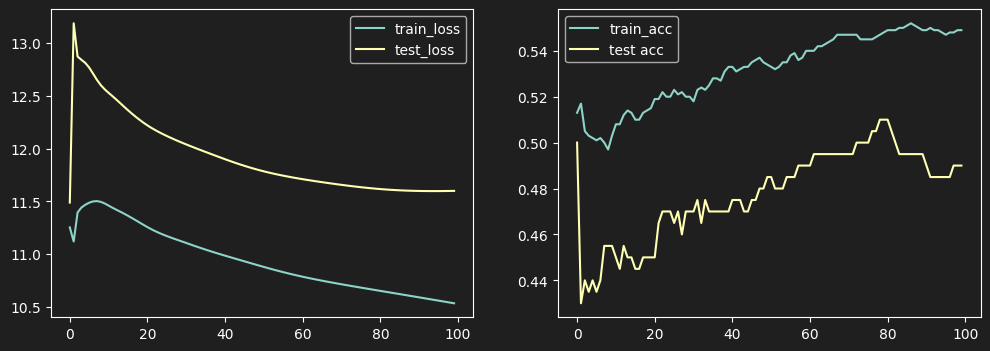

In [87]:
(w,b) = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.01, n_iter=1000)
#concernat les dim on rencontre un phenome de le flux haut de dimension 
#comme 1000 , 4096
# 1000 images 4096 features

In [88]:
# # POUR AVOIR UNE SEUL FEATURE (1000, 64*64)
X_train_reshape =  X_train.reshape(X_train.shape[0],-1) # qlq chose plus rapide -1 tout ce qui il reste à reorganiser 
# X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]) 
X_test_reshape = X_test.reshape(X_test.shape[0],-1)
print(X_train_reshape.shape, X_test_reshape.shape)

(1000, 4096) (200, 4096)


np.exp(200)


#### Sigmoid Activation (Prevents Overflow)



```python
```

The sigmoid function can overflow when \( Z \) is large (positive or negative). To prevent this, we use:
```python
def sigmoid(Z):
    # Pour éviter l'overflow
    Z = np.clip(Z, -500, 500)  # Limite Z dans une plage sûre
    return 1 / (1 + np.exp(-Z))
```

#### Softmax Activation (Numerically Stable)
Softmax can also cause overflow if \( Z \) contains very large values. To address this, subtract the maximum value of \( Z \) from each element:
```python
def softmax(Z):
    # Stabilisation numérique
    Z_stable = Z - np.max(Z, axis=1, keepdims=True)
    exp_Z = np.exp(Z_stable)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
```

---

### Why Normalize or Stabilize?
- **Large \( Z \) values**: Cause overflow in `np.exp(Z)` or `1 / (1 + np.exp(-Z))`.
- **Normalizing \( Z \)**: Keeps values within a range where computations are stable.
- **Clipping or shifting \( Z \)**: Ensures numerical operations don't hit computational limits.

---

### Summary of Changes:
- **Normalize \( Z \)**: Use `(Z - mean) / std` to rescale values.
- **Clip \( Z \)**: Prevent extreme values in activations.
- **Use numerically stable softmax or sigmoid**: Subtract max \( Z \) or clip \( Z \).

